In [1]:
import tensorflow as tf
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import cv2
import imghdr

In [4]:
data_dir='data'

In [5]:
image_exts=['jpeg','jpg','png','bmp']

In [6]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [8]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [9]:
tf.keras.utils.image_dataset_from_directory??
#we can change batch size, image size or anthing if we want
#tf.keras.utils.image_dataset_from_directory('data',batch_size=8,image_size=(128,128))

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [10]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [11]:
data_iterator=data.as_numpy_iterator()

In [12]:
#get another batch from the iterator
batch=data_iterator.next()

In [13]:
len(batch)

2

In [14]:
#images represented as numpy arrays
batch[0]

array([[[[2.50843750e+02, 8.59989014e+01, 9.37053833e+01],
         [2.42943909e+02, 1.26135071e+02, 1.05003601e+02],
         [1.56539368e+02, 1.38553955e+02, 9.18085327e+01],
         ...,
         [7.42191772e+01, 8.36039429e+01, 3.51894531e+01],
         [7.13964844e+01, 7.96035156e+01, 3.64342041e+01],
         [6.69779663e+01, 7.36434326e+01, 3.35850830e+01]],

        [[2.51130249e+02, 8.12785645e+01, 9.73345947e+01],
         [2.47923035e+02, 1.16634766e+02, 1.02228638e+02],
         [1.65119202e+02, 1.35171021e+02, 9.03068848e+01],
         ...,
         [7.54437866e+01, 8.36332397e+01, 3.66332397e+01],
         [7.12792969e+01, 8.02792969e+01, 3.62167969e+01],
         [6.71266479e+01, 7.48105469e+01, 3.37809448e+01]],

        [[2.52507080e+02, 8.39605713e+01, 9.62441406e+01],
         [2.50487427e+02, 1.09669922e+02, 1.02458313e+02],
         [1.69277527e+02, 1.35425964e+02, 9.15449829e+01],
         ...,
         [7.34259644e+01, 8.19648438e+01, 3.56507568e+01],
         [

In [15]:
# happy or sad labels
batch[1]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

In [16]:
batch[0].shape

(32, 256, 256, 3)

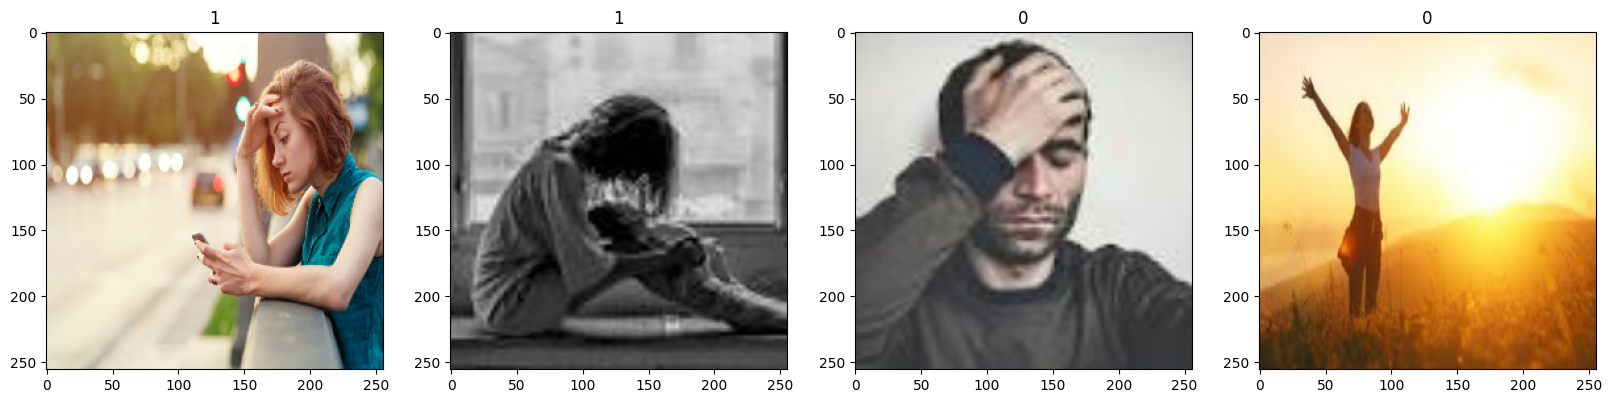

In [17]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
scaled=batch[0]/255

In [19]:
scaled.max()

1.0

In [20]:
data=data.map(lambda x,y:(x/255,y))

In [21]:
scaled_iterator=data.as_numpy_iterator().next()[0].max()
scaled_iterator

1.0

In [22]:
len(data)

10

In [23]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)

In [24]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [26]:
model= Sequential()

In [27]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [29]:
# Conv2D??

In [34]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [35]:
logdir='logs'

In [36]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
tensorboard_callback

In [37]:
hist=model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10
7/7 [==============================] - 22s 2s/step - loss: 0.9723 - accuracy: 0.4866 - val_loss: 0.7046 - val_accuracy: 0.5156
Epoch 2/10
7/7 [==============================] - 18s 2s/step - loss: 0.6944 - accuracy: 0.4911 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 18s 2s/step - loss: 0.6868 - accuracy: 0.6741 - val_loss: 0.6779 - val_accuracy: 0.8594
Epoch 4/10
7/7 [==============================] - 18s 2s/step - loss: 0.6564 - accuracy: 0.6339 - val_loss: 0.5911 - val_accuracy: 0.5938
Epoch 5/10
7/7 [==============================] - 18s 2s/step - loss: 0.6251 - accuracy: 0.6652 - val_loss: 0.6197 - val_accuracy: 0.7031
Epoch 6/10
7/7 [==============================] - 18s 2s/step - loss: 0.5436 - accuracy: 0.7634 - val_loss: 0.4282 - val_accuracy: 0.7812
Epoch 7/10
7/7 [==============================] - 17s 2s/step - loss: 0.4676 - accuracy: 0.7857 - val_loss: 0.3854 - val_accuracy: 0.8594
Epoch 8/10
7/7 [==================

In [38]:
hist.history

{'loss': [0.9722886085510254,
  0.6943894624710083,
  0.6867769956588745,
  0.6564439535140991,
  0.6250758171081543,
  0.5435737371444702,
  0.4676121175289154,
  0.3385376036167145,
  0.2685966491699219,
  0.23910042643547058],
 'accuracy': [0.4866071343421936,
  0.4910714328289032,
  0.6741071343421936,
  0.6339285969734192,
  0.6651785969734192,
  0.7633928656578064,
  0.7857142686843872,
  0.8883928656578064,
  0.90625,
  0.9241071343421936],
 'val_loss': [0.704560399055481,
  0.689740002155304,
  0.6778545379638672,
  0.5910652875900269,
  0.6197425127029419,
  0.4281643033027649,
  0.38536354899406433,
  0.22003072500228882,
  0.2689164876937866,
  0.3070473074913025],
 'val_accuracy': [0.515625,
  0.5,
  0.859375,
  0.59375,
  0.703125,
  0.78125,
  0.859375,
  0.921875,
  0.875,
  0.875]}

In [39]:
hist.history['val_loss']

[0.704560399055481,
 0.689740002155304,
 0.6778545379638672,
 0.5910652875900269,
 0.6197425127029419,
 0.4281643033027649,
 0.38536354899406433,
 0.22003072500228882,
 0.2689164876937866,
 0.3070473074913025]

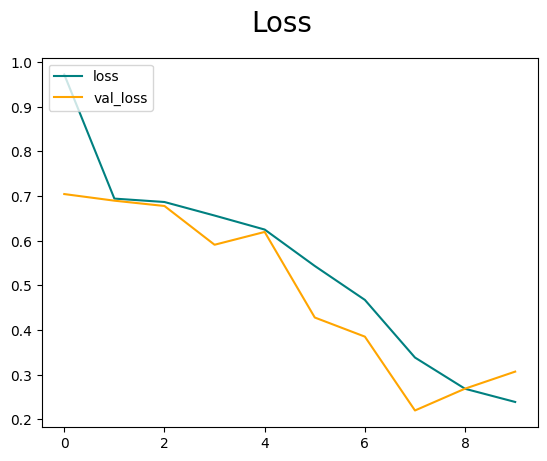

In [49]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

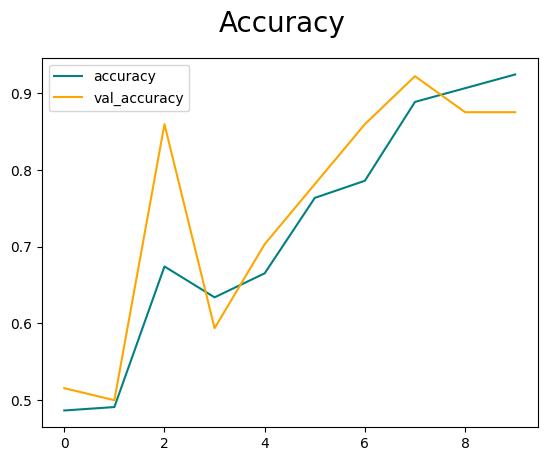

In [50]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [51]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [56]:
len(test)

1

In [79]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 232ms/step


In [80]:
print(f'Precision: {pre.result().numpy()}')
print(f'Recall: {re.result().numpy()}')
print(f'Accuracy: {acc.result().numpy()}')

Precision: 0.6666666865348816
Recall: 0.9873417615890503
Accuracy: 0.7860962748527527


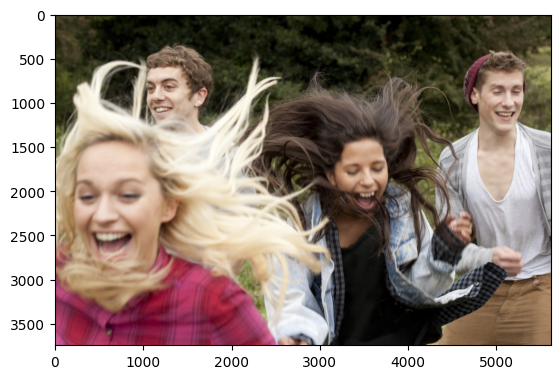

In [82]:
img1=cv2.imread('hap.jpg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

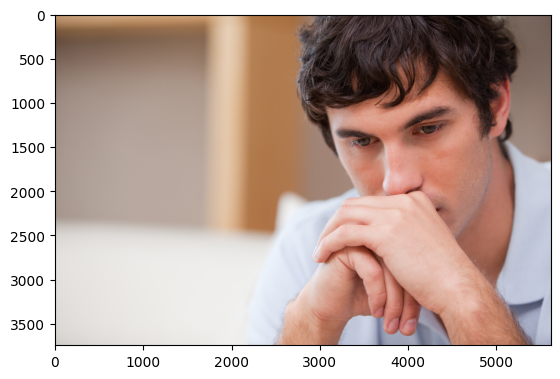

In [83]:
img2=cv2.imread('sed.jpg')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))
plt.show()

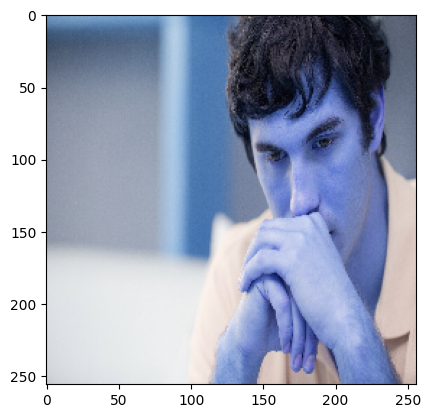

In [93]:
resize=tf.image.resize(img2,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [97]:
resize.shape

TensorShape([256, 256, 3])

In [96]:
np.expand_dims(resize,axis=0).shape

(1, 256, 256, 3)

In [106]:
yhatt=model.predict(np.expand_dims(resize/255,axis=0))

1/1 [==============================] - 0s 71ms/step


In [107]:
yhatt

array([[0.81375414]], dtype=float32)

In [109]:
if yhatt>0.5:
    print('Predicted class is Sad')
else:
    print('Predicted class is Happy')

Predicted class is Sad


In [110]:
from tensorflow.keras.models import load_model

In [111]:
model.save(os.path.join('my_model','ImageClassifier_CNN.h5'))

In [112]:
new_model=load_model(os.path.join('my_model','ImageClassifier_CNN.h5'))

In [113]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 216ms/step


array([[0.81375414]], dtype=float32)